In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#import datasets
train_df = pd.read_csv("Neighbor_feautures_train.csv")
test_df = pd.read_csv("Neighbor_feautures_test.csv")

In [3]:
y_train = train_df["y"]
x_train = train_df.drop("y", axis=1)
y_test = test_df["y"]
x_test = test_df.drop("y", axis=1)

# Correlation Matrix

As expected, since all these feature are based on neighbors they are all correlated

<AxesSubplot:>

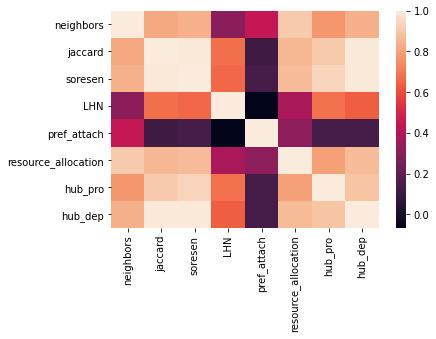

In [25]:
sns.heatmap(x_train.corr())

# Test each feature alone using Logistic Regression

We want to test the efficiacy of each metric alone in predicting if there is an adge or not

In [20]:
results = []
#I save the results for each features
for i in x_train.columns:
    res = []
    res.append(i)
    logr = LogisticRegression()
    #fit the model using just one metric
    logr.fit(x_train[i].values.reshape(-1, 1),y_train)
    #save the coefficient
    res.append(float(logr.coef_[0]))
    #save the accuracy
    res.append(accuracy_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    #save the F1 score
    res.append(f1_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    results.append(res)

In [21]:
metrics_scores = pd.DataFrame(results, columns = ["Metric", "Coefficient", "Accuracy","F1-score"])

In [22]:
metrics_scores

,Metric,Coefficient,Accuracy,F1-score
0,neighbors,7.912202,0.961460,0.959935
1,jaccard,86.869832,0.955602,0.953559
2,soresen,63.860945,0.958180,0.956374
3,LHN,163.905315,0.917701,0.910350
4,pref_attach,0.007842,0.697802,0.698292
5,resource_allocation,84.566326,0.957646,0.955791
6,hub_pro,48.043224,0.960991,0.959428
7,hub_dep,74.713783,0.956364,0.954393


# Random Forest

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier())], 
    verbose = True)

In [10]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=  11.3s


Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree', RandomForestClassifier())],
         verbose=True)

Text(0.5, 0, 'Random Forest Feature Importance')

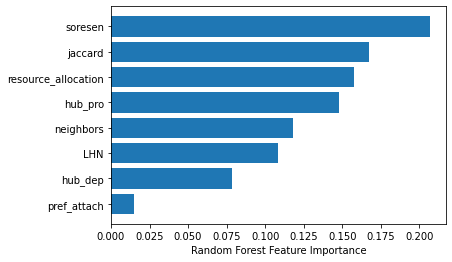

In [11]:
sorted_idx = pipeline["classifier"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["classifier"].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [12]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.958785223201317
